# Exercise 1 - generate Data

In [55]:
from cmdstanpy import CmdStanModel

import arviz as az
import numpy as np
import scipy.stats as stats

import matplotlib.pyplot as plt
import pandas as pd

In [56]:
F = 7 # Natalia
L = 5 # Pluta

N = (L+F)*100
R = 1000

INFO:cmdstanpy:found newer exe file, not recompiling
INFO:cmdstanpy:CmdStan start processing


chain 1 |          | 00:00 Status

INFO:cmdstanpy:CmdStan done processing.


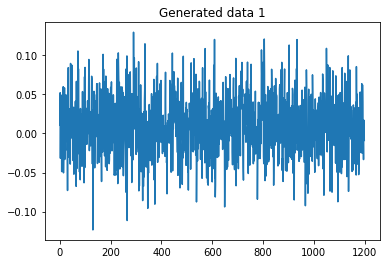

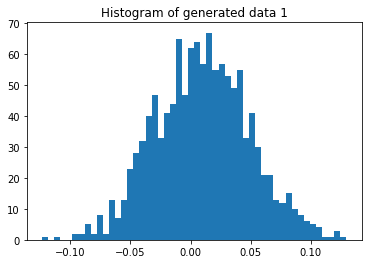

In [57]:
# 1. Compile code1.stan
model_gen_1=CmdStanModel(stan_file='code_1.stan')

# 2. Generate data for rest of excercises.
gen_1=model_gen_1.sample(data={'N': N},
                         fixed_param=True,
                         iter_sampling=R,
                         iter_warmup=0,
                         chains=1)

df_gen_1 = gen_1.draws_pd()
gen_1.summary()

y_gen_1_median = np.zeros(N)
# Caluculate ndarray median from stan variable
for i in range(0, N):
    y_gen_1_median[i] = np.median(gen_1.stan_variable('y')[:, i])

# Plot generated data
plt.plot(y_gen_1_median)
plt.title('Generated data 1')
plt.show()

# Plot histogram of generated data
plt.hist(y_gen_1_median, bins=50)
plt.title('Histogram of generated data 1')
plt.show()

INFO:cmdstanpy:found newer exe file, not recompiling
INFO:cmdstanpy:CmdStan start processing


chain 1 |          | 00:00 Status

INFO:cmdstanpy:CmdStan done processing.


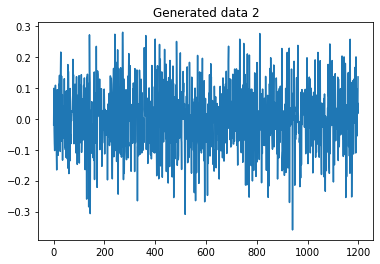

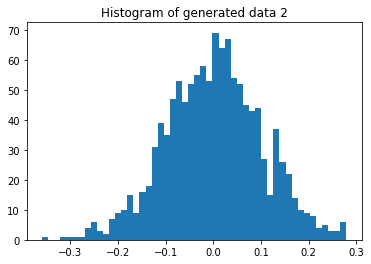

In [58]:
# 1. Compile code_2.stan
model_gen_2=CmdStanModel(stan_file='code_2.stan')

# 2. Generate data for rest of excercises.
gen_2=model_gen_2.sample(data={'N': N},
                         fixed_param=True,
                         iter_sampling=R,
                         iter_warmup=0,
                         chains=1)

df_gen_2 = gen_2.draws_pd()
gen_2.summary()

y_gen_2_median = np.zeros(N)
# Caluculate ndarray median from stan variable
for i in range(0, N):
    y_gen_2_median[i] = np.median(gen_2.stan_variable('y')[:, i])

# Plot generated data
plt.plot(y_gen_2_median)
plt.title('Generated data 2')
plt.show()

# Plot histogram of generated data
plt.hist(y_gen_2_median, bins=50)
plt.title('Histogram of generated data 2')
plt.show()


## Excercise 2 - compare normal and student models for data from first file

In [59]:
# 1. Compile code_3.stan
model_gen_3=CmdStanModel(stan_file='code_3.stan')

# 2. Fit model to generated data 1
gen_3_fit_1=model_gen_3.sample(data={'N': N, 'y': y_gen_1_median},
                               chains=5)

gen_3_fit_1.summary()

INFO:cmdstanpy:found newer exe file, not recompiling
INFO:cmdstanpy:CmdStan start processing


chain 1 |          | 00:00 Status

chain 2 |          | 00:00 Status

chain 3 |          | 00:00 Status

chain 4 |          | 00:00 Status

chain 5 |          | 00:00 Status

INFO:cmdstanpy:CmdStan done processing.


,Mean,MCSE,StdDev,5%,50%,95%,N_Eff,N_Eff/s,R_hat
name,,,,,,,,,
lp__,2200.0000,0.033000,1.10000,2200.0000,2200.0000,2200.000,1000.0,150.0,1.0
sigma,0.0390,0.000023,0.00081,0.0380,0.0390,0.041,1200.0,180.0,1.0
mu,0.0097,0.000015,0.00110,0.0079,0.0097,0.012,5400.0,790.0,1.0
log_lik[1],2.3000,0.000590,0.02100,2.3000,2.3000,2.400,1227.0,178.0,1.0
log_lik[2],1.7000,0.000430,0.03100,1.7000,1.7000,1.800,5237.0,760.0,1.0
...,...,...,...,...,...,...,...,...,...
y_hat[1196],0.0097,0.000560,0.03900,-0.0550,0.0096,0.074,4829.0,701.0,1.0
y_hat[1197],0.0100,0.000550,0.03900,-0.0540,0.0100,0.073,4925.0,715.0,1.0
y_hat[1198],0.0093,0.000560,0.03900,-0.0550,0.0093,0.073,4779.0,694.0,1.0


In [60]:
# 2. Fit model to generated data 2
gen_3_fit_2=model_gen_3.sample(data={'N': N, 'y': y_gen_2_median},
                               chains=5)

gen_3_fit_2.summary()

INFO:cmdstanpy:CmdStan start processing


chain 1 |          | 00:00 Status

chain 2 |          | 00:00 Status

chain 3 |          | 00:00 Status

chain 4 |          | 00:00 Status

chain 5 |          | 00:00 Status

INFO:cmdstanpy:CmdStan done processing.


,Mean,MCSE,StdDev,5%,50%,95%,N_Eff,N_Eff/s,R_hat
name,,,,,,,,,
lp__,1000.000000,0.020000,0.9900,1000.000,1000.00000,1000.0000,2400.0,310.0,1.0
sigma,0.100000,0.000039,0.0020,0.098,0.10000,0.1000,2700.0,360.0,1.0
mu,0.001700,0.000042,0.0029,-0.003,0.00180,0.0065,4800.0,630.0,1.0
log_lik[1],1.300000,0.000380,0.0200,1.300,1.30000,1.4000,2723.0,353.0,1.0
log_lik[2],0.920000,0.000400,0.0270,0.870,0.92000,0.9600,4723.0,612.0,1.0
...,...,...,...,...,...,...,...,...,...
y_hat[1196],0.000920,0.001500,0.1000,-0.170,0.00120,0.1700,4840.0,627.0,1.0
y_hat[1197],-0.000098,0.001400,0.1000,-0.170,-0.00017,0.1700,4882.0,632.0,1.0
y_hat[1198],0.000160,0.001500,0.1000,-0.170,-0.00078,0.1700,4873.0,631.0,1.0


In [61]:
# 1. Compile code_4.stan
model_gen_4=CmdStanModel(stan_file='code_4.stan')

# 2. Fit model to generated data 1
gen_4_fit_1=model_gen_4.sample(data={'N': N, 'y': y_gen_1_median},
                               chains=5)

gen_4_fit_1.summary()

INFO:cmdstanpy:found newer exe file, not recompiling
INFO:cmdstanpy:CmdStan start processing


chain 1 |          | 00:00 Status

chain 2 |          | 00:00 Status

chain 3 |          | 00:00 Status

chain 4 |          | 00:00 Status

chain 5 |          | 00:00 Status

INFO:cmdstanpy:CmdStan done processing.


,Mean,MCSE,StdDev,5%,50%,95%,N_Eff,N_Eff/s,R_hat
name,,,,,,,,,
lp__,2200.0000,0.031000,1.2000,2200.0000,2200.0000,2200.000,1600.0,160.0,1.0
sigma,0.0380,0.000020,0.0009,0.0370,0.0380,0.040,1900.0,190.0,1.0
mu,0.0097,0.000014,0.0011,0.0079,0.0097,0.012,6800.0,680.0,1.0
nu,40.0000,0.340000,15.0000,20.0000,37.0000,68.000,1900.0,190.0,1.0
log_lik[1],2.3000,0.000500,0.0220,2.3000,2.3000,2.400,2023.0,202.0,1.0
...,...,...,...,...,...,...,...,...,...
y_hat[1196],0.0100,0.000550,0.0400,-0.0540,0.0110,0.077,5186.0,517.0,1.0
y_hat[1197],0.0110,0.000570,0.0400,-0.0540,0.0110,0.075,4932.0,491.0,1.0
y_hat[1198],0.0094,0.000530,0.0390,-0.0530,0.0083,0.073,5237.0,522.0,1.0


In [62]:
# 2. Fit model to generated data 2
gen_4_fit_2 = model_gen_4.sample(data={'N': N, 'y': y_gen_2_median},
                                 chains=5)

gen_4_fit_2.summary()

INFO:cmdstanpy:CmdStan start processing


chain 1 |          | 00:00 Status

chain 2 |          | 00:00 Status

chain 3 |          | 00:00 Status

chain 4 |          | 00:00 Status

chain 5 |          | 00:00 Status

INFO:cmdstanpy:CmdStan done processing.


,Mean,MCSE,StdDev,5%,50%,95%,N_Eff,N_Eff/s,R_hat
name,,,,,,,,,
lp__,1000.0000,0.025000,1.2000,1000.0000,1000.00000,1000.0000,2200.0,230.0,1.0
sigma,0.0980,0.000051,0.0024,0.0940,0.09800,0.1000,2200.0,230.0,1.0
mu,0.0018,0.000039,0.0030,-0.0031,0.00180,0.0068,5700.0,600.0,1.0
nu,34.0000,0.310000,14.0000,17.0000,31.00000,63.0000,2200.0,230.0,1.0
log_lik[1],1.4000,0.000450,0.0230,1.3000,1.40000,1.4000,2555.0,271.0,1.0
...,...,...,...,...,...,...,...,...,...
y_hat[1196],0.0028,0.001500,0.1000,-0.1600,-0.00033,0.1700,4960.0,526.0,1.0
y_hat[1197],0.0018,0.001400,0.0980,-0.1600,0.00260,0.1600,4817.0,511.0,1.0
y_hat[1198],0.0041,0.001400,0.1000,-0.1600,0.00490,0.1700,5052.0,536.0,1.0


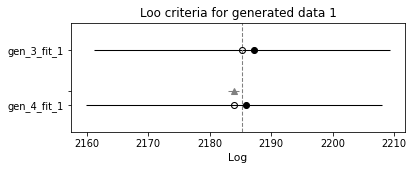

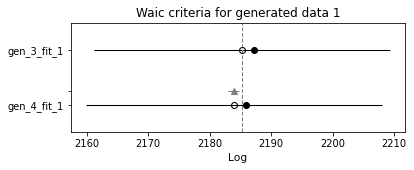

In [63]:
# 3 Using az.compare and az.plot_compare analyze both models using loo and waic criteria.

# Generated data 1
fit_1_result = {'gen_3_fit_1': gen_3_fit_1, 'gen_4_fit_1': gen_4_fit_1}

comp_loo_1 = az.compare(fit_1_result, ic='loo')
az.plot_compare(comp_loo_1)
plt.title("Loo criteria for generated data 1")
plt.show()

comp_waic_1 = az.compare(fit_1_result, ic='waic')
az.plot_compare(comp_waic_1)
plt.title("Waic criteria for generated data 1")
plt.show()


According to the Leave-One-Out (LOO) cross-validation criterion as well as Widely Applicable Information Criterion (WAIC) the `model_gen_3` has better accuracy at making predictions on generated data 1 dataset.

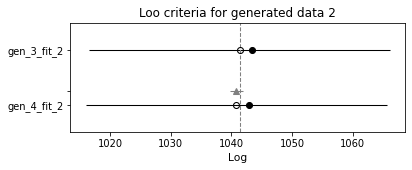

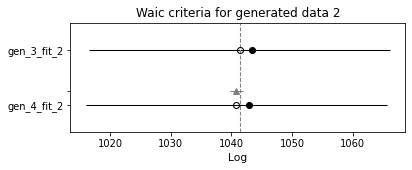

In [64]:
# 3 Using az.compare and az.plot_compare analyze both models using loo and waic criteria.

# Generated data 2
fit_2_result = {'gen_3_fit_2': gen_3_fit_2, 'gen_4_fit_2': gen_4_fit_2}

comp_loo_2 = az.compare(fit_2_result, ic='loo')
az.plot_compare(comp_loo_2)
plt.title("Loo criteria for generated data 2")
plt.show()

comp_waic_2 = az.compare(fit_2_result, ic='waic')
az.plot_compare(comp_waic_2)
plt.title("Waic criteria for generated data 2")
plt.show()


According to the Leave-One-Out (LOO) cross-validation criterion as well as Widely Applicable Information Criterion (WAIC) the `model_gen_4` has better accuracy at making predictions on generated data 2 dataset.

# Excercise 3 - compare models with different numbers of predictors

In [65]:
# 1 Compile code_5.stan
model_gen_5=CmdStanModel(stan_file='code_5.stan')

# 2 Compare models for 1, 2, and 3 predictors as in previous excercise
median_gen_2 = np.percentile(gen_2.stan_variable('X'), 50, axis=0)
k1_median_gen_2 = median_gen_2[:,0:1]
k2_median_gen_2 = median_gen_2[:,0:2]
k3_median_gen_2 = median_gen_2[:,0:3]

INFO:cmdstanpy:found newer exe file, not recompiling


In [70]:
# Fit model to generated data 2 with 1 predictor
gen_5_fit_k1=model_gen_5.sample(data={'N': N, 'K': 1, 'y': y_gen_2_median, 'X': k1_median_gen_2},
                                chains=5)

gen_5_fit_k1.summary()

INFO:cmdstanpy:CmdStan start processing


chain 1 |          | 00:00 Status

chain 2 |          | 00:00 Status

chain 3 |          | 00:00 Status

chain 4 |          | 00:00 Status

chain 5 |          | 00:00 Status

INFO:cmdstanpy:CmdStan done processing.


,Mean,MCSE,StdDev,5%,50%,95%,N_Eff,N_Eff/s,R_hat
name,,,,,,,,,
lp__,2400.0000,0.021000,1.00000,2400.000,2400.0000,2400.000,2300.0,240.0,1.0
sigma,0.0820,0.000025,0.00170,0.080,0.0820,0.085,4600.0,480.0,1.0
beta[1],1.5000,0.000900,0.06100,1.400,1.5000,1.600,4505.0,471.0,1.0
mu[1],-0.0240,0.000014,0.00094,-0.025,-0.0240,-0.022,4505.0,471.0,1.0
mu[2],-0.0240,0.000014,0.00095,-0.025,-0.0240,-0.022,4505.0,471.0,1.0
...,...,...,...,...,...,...,...,...,...
y_hat[1196],-0.0540,0.001200,0.08300,-0.190,-0.0550,0.084,5130.0,536.0,1.0
y_hat[1197],-0.0230,0.001200,0.08200,-0.160,-0.0230,0.110,4606.0,482.0,1.0
y_hat[1198],-0.0059,0.001200,0.08200,-0.140,-0.0065,0.130,4784.0,500.0,1.0


In [67]:
# Fit model to generated data 2 with 2 predictors
gen_5_fit_k2=model_gen_5.sample(data={'N': N, 'K': 2, 'y': y_gen_2_median, 'X': k2_median_gen_2},
                                chains=5)

gen_5_fit_k2.summary()

INFO:cmdstanpy:CmdStan start processing


chain 1 |          | 00:00 Status

chain 2 |          | 00:00 Status

chain 3 |          | 00:00 Status

chain 4 |          | 00:00 Status

chain 5 |          | 00:00 Status

INFO:cmdstanpy:CmdStan done processing.


,Mean,MCSE,StdDev,5%,50%,95%,N_Eff,N_Eff/s,R_hat
name,,,,,,,,,
lp__,2500.000,0.025000,1.20000,2500.000,2500.000,2500.000,2300.0,200.0,1.0
sigma,0.078,0.000023,0.00160,0.075,0.078,0.080,4800.0,410.0,1.0
beta[1],1.500,0.000790,0.05700,1.400,1.500,1.600,5313.0,453.0,1.0
beta[2],0.650,0.000730,0.05500,0.570,0.650,0.750,5606.0,478.0,1.0
mu[1],-0.022,0.000012,0.00089,-0.024,-0.022,-0.021,5299.0,452.0,1.0
...,...,...,...,...,...,...,...,...,...
y_hat[1196],-0.061,0.001100,0.07800,-0.190,-0.060,0.065,5050.0,430.0,1.0
y_hat[1197],-0.035,0.001100,0.07800,-0.160,-0.037,0.094,4795.0,409.0,1.0
y_hat[1198],0.019,0.001100,0.07900,-0.110,0.018,0.150,4881.0,416.0,1.0


In [68]:
# Fit model to generated data 2 with 3 predictors
gen_5_fit_k3=model_gen_5.sample(data={'N': N, 'K': 3, 'y': y_gen_2_median, 'X': k3_median_gen_2},
                                chains=5)

gen_5_fit_k3.summary()

INFO:cmdstanpy:CmdStan start processing


chain 1 |          | 00:00 Status

chain 2 |          | 00:00 Status

chain 3 |          | 00:00 Status

chain 4 |          | 00:00 Status

chain 5 |          | 00:00 Status

INFO:cmdstanpy:CmdStan done processing.


,Mean,MCSE,StdDev,5%,50%,95%,N_Eff,N_Eff/s,R_hat
name,,,,,,,,,
lp__,2500.0000,0.028000,1.4000,2500.000,2500.0000,2500.000,2500.0,240.0,1.0
sigma,0.0770,0.000022,0.0016,0.075,0.0770,0.080,5300.0,520.0,1.0
beta[1],1.5000,0.000800,0.0570,1.400,1.5000,1.600,5007.0,487.0,1.0
beta[2],0.6500,0.000690,0.0570,0.550,0.6500,0.740,6679.0,650.0,1.0
beta[3],0.2900,0.000790,0.0580,0.200,0.2900,0.380,5287.0,515.0,1.0
...,...,...,...,...,...,...,...,...,...
y_hat[1196],-0.0600,0.001100,0.0780,-0.190,-0.0600,0.069,5008.0,487.0,1.0
y_hat[1197],-0.0490,0.001100,0.0770,-0.170,-0.0490,0.078,4989.0,486.0,1.0
y_hat[1198],0.0036,0.001100,0.0780,-0.120,0.0016,0.130,4969.0,484.0,1.0


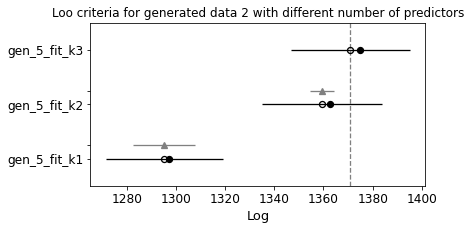

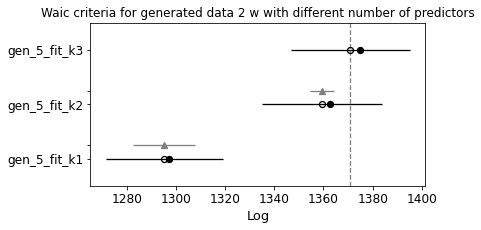

In [69]:
# Using az.compare and az.plot_compare analyze both models using loo and waic criteria.

# Generated data 2 with different number of predictors
fit_predictors_result = {'gen_5_fit_k1' : gen_5_fit_k1, 'gen_5_fit_k2': gen_5_fit_k2, 'gen_5_fit_k3': gen_5_fit_k3}

comp_loo_predictors = az.compare(fit_predictors_result, ic='loo')
az.plot_compare(comp_loo_predictors)
plt.title("Loo criteria for generated data 2 with different number of predictors")
plt.show()

comp_waic_predictors = az.compare(fit_predictors_result, ic='waic')
az.plot_compare(comp_loo_predictors)
plt.title("Waic criteria for generated data 2 w with different number of predictors")
plt.show()


As can be seen from the comparison plots presented above, increasing the number of predictors used in the model results in better prediction accuracy on generated data 2, according to both the Leave-One-Out (LOO) cross-validation criterion and the Widely Applicable Information Criterion (WAIC). Additionally, using fewer predictors in the model results in greater uncertainty (for both LOO and WAIC criteria).